In [1]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
print("Tüm kütüphaneler başarıyla yüklendi!")

Tüm kütüphaneler başarıyla yüklendi!


In [5]:
import tensorflow as tf
print(tf.__version__)  # TensorFlow sürümünü yazdırır

2.18.0


In [46]:
import pandas as pd

# CSV dosyasını yükle
data = pd.read_csv(r"C:\Users\emir_\OneDrive\Masaüstü\ödev\train.csv")  # Tam yol kullanın

# İlk birkaç satırı görüntüle
print("İlk 5 Satır:\n", data.head())

# Veri setinin genel bilgilerini görüntüle
print("\nVeri Seti Bilgileri:")
print(data.info())

İlk 5 Satır:
    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0     

In [50]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Örnek etiketler (y)
y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # 10 farklı sınıf (0'dan 9'a)

# Etiketleri kategorik hale getir
y_categorical = to_categorical(y, num_classes=10)

# Örnek giriş verisi (X)
X = np.random.rand(10, 28, 28, 1)  # 10 örnek, her biri 28x28 boyutunda tek kanallı görüntüler

print(f"Veri şekli: {X.shape}")
print(f"Etiket şekli: {y_categorical.shape}")

Veri şekli: (10, 28, 28, 1)
Etiket şekli: (10, 10)


In [52]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim verisi şekli: {X_train.shape}")
print(f"Test verisi şekli: {X_test.shape}")

Eğitim verisi şekli: (8, 28, 28, 1)
Test verisi şekli: (2, 28, 28, 1)


In [54]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(28, 28, 1)),  # İlk katmanda Input nesnesi kullanıyoruz
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [61]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np

# Örnek veri (MNIST formatında)
X_train = np.random.rand(60000, 28, 28, 1)  # 60,000 örnek, 28x28 boyutunda
X_test = np.random.rand(10000, 28, 28, 1)   # 10,000 test örneği
y_train = np.random.randint(0, 10, 60000)   # 0-9 arası etiketler
y_test = np.random.randint(0, 10, 10000)

# Hedefleri kategorik hale getir
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Model oluşturma
model = Sequential([
    Input(shape=(28, 28, 1)),  # Giriş katmanı
    Flatten(),                 # Düzleştirme katmanı
    Dense(128, activation='relu'),  # Gizli katman
    Dense(10, activation='softmax') # Çıkış katmanı
])

# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train,
                    epochs=10,  # 10 epoch
                    validation_data=(X_test, y_test),
                    batch_size=32)  # Her iterasyonda 32 örnek

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0984 - loss: 2.3236 - val_accuracy: 0.0961 - val_loss: 2.3030
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1025 - loss: 2.3026 - val_accuracy: 0.0961 - val_loss: 2.3030
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1038 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3030
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1012 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3032
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1032 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3030
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1046 - loss: 2.3026 - val_accuracy: 0.0999 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3029
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1017 - loss: 2.3027 - 

In [67]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test doğruluk oranı: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.0981 - loss: 2.3028
Test doğruluk oranı: 0.10


Epoch 1/50


C:\Users\emir_\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\emir_\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.1000 - loss: 2.3028 - val_accuracy: 0.0961 - val_loss: 2.3029 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1012 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3030 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1027 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3030 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1026 - loss: 2.3027 - val_accuracy: 0.0961 - val_loss: 2.3028 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.0996 - loss: 2.3026 - val_accuracy: 0.0961 - val_loss: 2.3029 - learning_rate: 5.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1034 - loss: 2.3026 - val_accuracy: 0.0961 - val_loss: 2.3029 - learning_rate: 5.0000e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1011

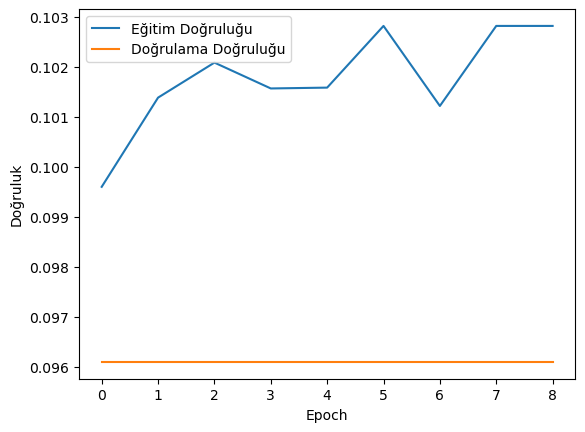

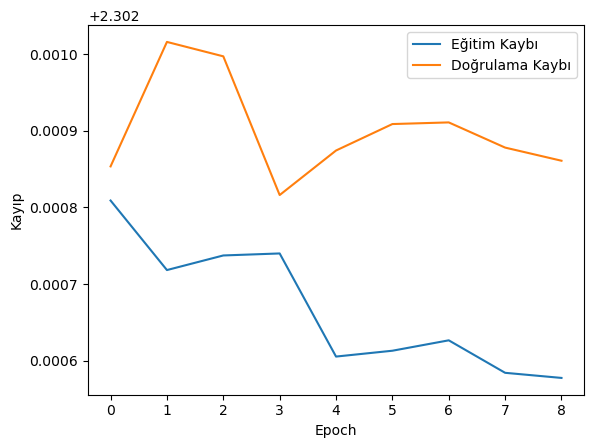

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Veri normalizasyonu
X_train = X_train / 255.0
X_test = X_test / 255.0

# Veri artırma (data augmentation)
datagen = ImageDataGenerator(
    rotation_range=15,         # Görüntüleri döndür
    width_shift_range=0.1,     # Genişlik kaydırma
    height_shift_range=0.1,    # Yükseklik kaydırma
    zoom_range=0.1             # Yakınlaştırma
)
datagen.fit(X_train)

# Model oluşturma
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Aşırı öğrenmeyi önlemek için dropout
    Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.001),  # Daha küçük veya uyarlanabilir öğrenme hızı
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Erken durdurma ve öğrenme hızı azaltma
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Modeli eğitme
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    callbacks=[early_stopping, reduce_lr])

# Eğitim ve doğrulama doğruluk oranlarını görselleştir
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kayıplarını görselleştir
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


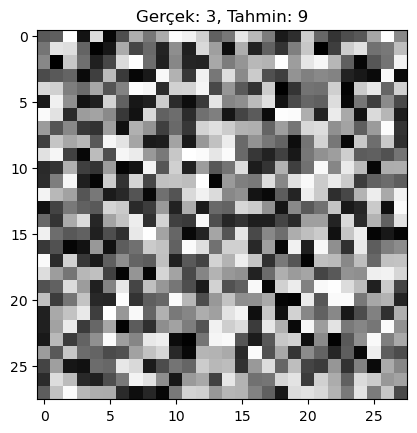

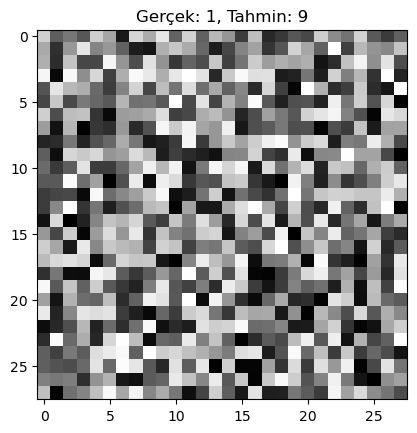

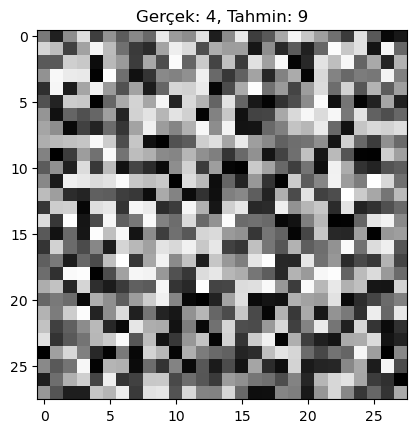

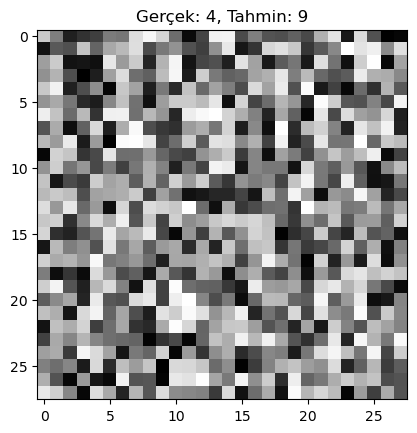

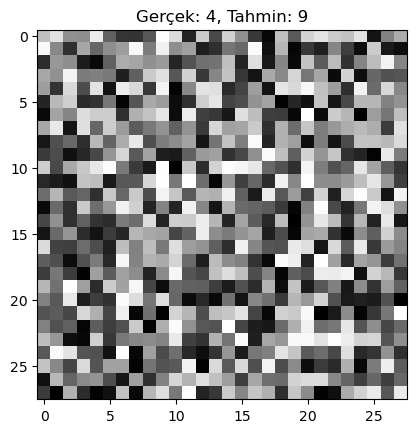

In [101]:
import numpy as np

# Test setinden bazı tahminler
predictions = model.predict(X_test)

# İlk 5 örneği görselleştir
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Gerçek: {np.argmax(y_test[i])}, Tahmin: {np.argmax(predictions[i])}")
    plt.show()

In [103]:
model.save("digit_recognizer_model.keras")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


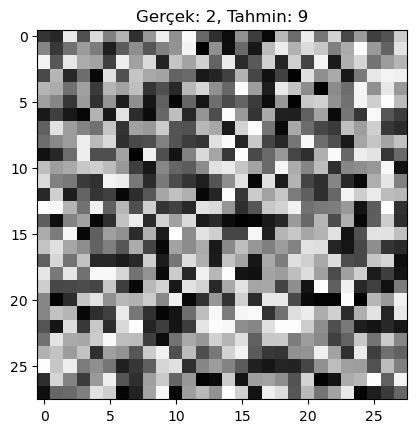

In [105]:
import numpy as np

# Test seti üzerinde tahmin yap
predictions = model.predict(X_test)

# Rastgele bir örneği seç ve sonucu gör
index = np.random.randint(0, len(X_test))
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Gerçek: {np.argmax(y_test[index])}, Tahmin: {np.argmax(predictions[index])}")
plt.show()

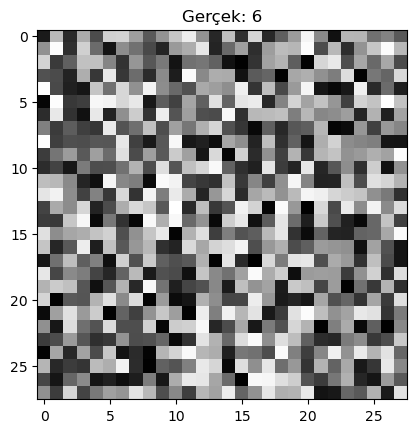

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Modelin Tahmini: 9


In [107]:
import numpy as np

# Test setinde etiketleri 7 olanları bul
six_indices = np.where(np.argmax(y_test, axis=1) == 6)[0]

# İlk 6 örneğini seç
index = six_indices[0]  # 6 rakamına ait ilk örneğin indeksini al

# Görüntüyü çizdir
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title("Gerçek: 6")
plt.show()

# Tahmini yap
prediction = model.predict(X_test[index].reshape(1, 28, 28, 1))  # Modelin beklediği şekle göre yeniden boyutlandır
print(f"Modelin Tahmini: {np.argmax(prediction)}")